In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (file harus sudah di-upload di Colab)
df = pd.read_csv("Students Social Media Addiction.csv")

print("Shape:", df.shape)
df.head()


Shape: (705, 13)


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


,Avg_Daily_Usage_Hours
Academic_Level,
High School,5.544444
Undergraduate,5.001416
Graduate,4.776923


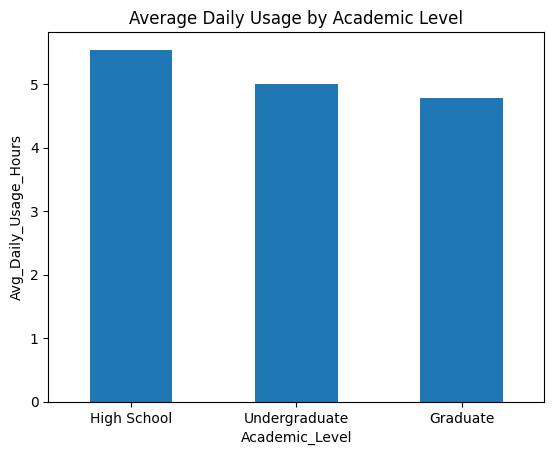

,count
Most_Used_Platform,
Instagram,249
TikTok,154
Facebook,123
WhatsApp,54
Twitter,30
LinkedIn,21
WeChat,15
Snapchat,13
VKontakte,12


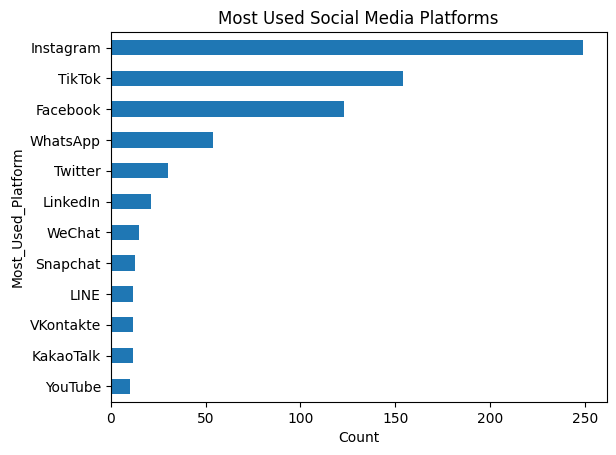

,Addicted_Score,Avg_Daily_Usage_Hours
Affects_Academic_Performance,,
No,4.595238,3.804365
Yes,7.461369,5.538631


<Figure size 640x480 with 0 Axes>

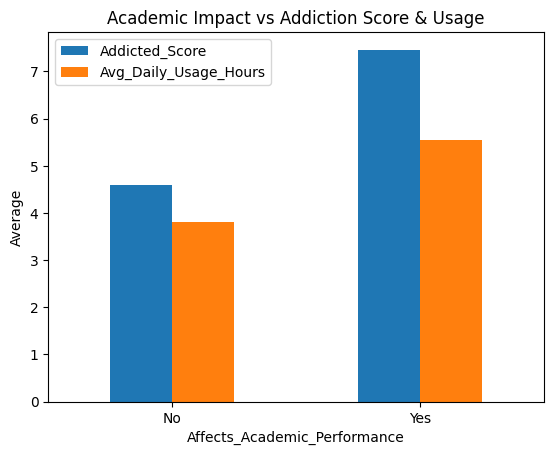

In [2]:
# pastikan kolom numerik kebaca angka
num_cols = ["Age", "Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Mental_Health_Score", "Addicted_Score"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Pivot 1: Avg usage by academic level
usage_by_level = df.groupby("Academic_Level")["Avg_Daily_Usage_Hours"].mean().sort_values(ascending=False)
display(usage_by_level)

plt.figure()
usage_by_level.plot(kind="bar")
plt.title("Average Daily Usage by Academic Level")
plt.ylabel("Avg_Daily_Usage_Hours")
plt.xticks(rotation=0)
plt.show()

# Pivot 2: Most used platform
platform_counts = df["Most_Used_Platform"].value_counts()
display(platform_counts)

plt.figure()
platform_counts.sort_values().plot(kind="barh")
plt.title("Most Used Social Media Platforms")
plt.xlabel("Count")
plt.show()

# Pivot 3 (HERO): Academic impact vs addiction & usage
impact = df.groupby("Affects_Academic_Performance")[["Addicted_Score", "Avg_Daily_Usage_Hours"]].mean()
display(impact)

plt.figure()
impact.plot(kind="bar")
plt.title("Academic Impact vs Addiction Score & Usage")
plt.ylabel("Average")
plt.xticks(rotation=0)
plt.show()


,Avg_Daily_Usage_Hours,Addicted_Score,Sleep_Hours_Per_Night,Mental_Health_Score
Avg_Daily_Usage_Hours,1.000000,0.832000,-0.790582,-0.801058
Addicted_Score,0.832000,1.000000,-0.764858,-0.945051
Sleep_Hours_Per_Night,-0.790582,-0.764858,1.000000,0.707439
Mental_Health_Score,-0.801058,-0.945051,0.707439,1.000000


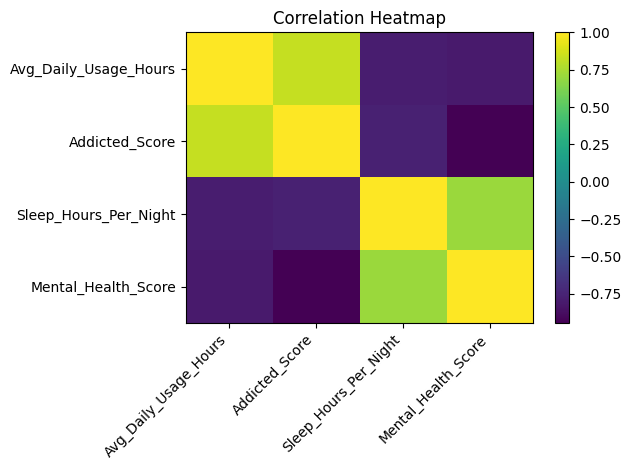

In [3]:
corr = df[["Avg_Daily_Usage_Hours", "Addicted_Score", "Sleep_Hours_Per_Night", "Mental_Health_Score"]].corr()
display(corr)

plt.figure()
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Heatmap")
plt.colorbar()
plt.tight_layout()
plt.show()
